# Algorithme de PageRank

## Introduction 

En 2019, le nombre de sites Internet s'élève à plus 1,7 milliard, d'après les statistiques annuelles obtenues par NetCraft et l'algorithme Worldmeters. Néanmoins, derrière ce chiffre impressionnant, le nombre de sites web considérés comme actifs ne s'élève qu'à moins de 200 millions.

Lorsque nous effectuons une recherche sur Google, on peut se demander comment Google classe les résultats de cette requête, au vu du grand nombre de données disponibles. En fait, il va utiliser une mesure de la qualité ou de la popularité des pages web (PageRank) pour classer les résultats par ordre de pertinence.

Le web peut être vu comme un graphe dirigé G(V,E) où les sommets V sont les pages web et les arcs E sont les hyperliens entre les pages. Les arcs partent de la page où se trouve le lien et vont vers la page indiquée. La présence d'un lien vers une certaine page constitue un "vote" en faveur de cette page. Le PageRank est donc une mesure de l'importance relative d'une page sur le web. Cette valeur est basée sur plusieurs principes : 
- Les pages recevant plus de liens sont plus importantes 
- Un lien en provenance d'une page " importante" est plus significatif qu'un lien en provenance d'une page peu importante 
- Si une page contient beaucoup de liens, chaque lien a moins de valeur. 

Plus formellement, le PageRank P de la page n est défini de la façon suivante : <br/>
$$ P(n) = \alpha ( \frac{1}{|G|} ) + (1-\alpha) \sum_{m \in L(n) } \frac{P(m)}{C(m)}$$

où |G| est le nombre total de noeuds ( ou de pages) dans le graphe,  <br/>
 $\alpha$ est le facteur aléatoire de "saut", <br/>
 L(n) est l'ensemble des pages liées à n , <br/>
 C(m) est le nombre de liens sur la page m, <br/>
 
Dans ce sens, l'ensemble des PageRank des L(n) pages vont altérer le PageRank de n. En effet, en étant sur une page m de L(n), la probabilité d'arriver sur la page n est de $\frac{1}{C(m)}$. Puisque le PageRank de m est la probabilité d'être en m, la probabilité d'arriver à n en étant à m est de $\frac{P(m)}{C(m)}$

https://medium.com/analytics-vidhya/how-google-search-works-page-rank-algorithm-using-python-9643d9c9a981
https://towardsdatascience.com/pagerank-3c568a7d2332

In [2]:
# Packages utilisés 

import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
import random as rd

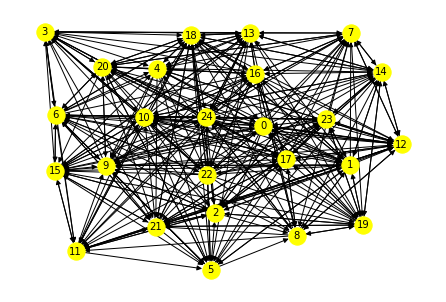

In [49]:
# Création d'un graphe orienté 
n = 25 # nombre de noeuds
p = 0.6 # probabilité de lien
graph=nx.gnp_random_graph(n,p,directed=True)
# Affichage du graphe
nx.draw(graph,with_labels=True,font_color='black',font_size=10,node_color='yellow')
plt.show()

In [50]:
# Nombre de noeuds 
count=graph.number_of_nodes()
# Voisins du noeud 1
print(list(graph.neighbors(1)))

[0, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16, 18, 19, 21, 23]


In [51]:
count

25

In [52]:
for j in range(0,n):
  print (j)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [53]:
#Page Rank Algorithm-Calculating random walk score
#initialising the dictionary which contains key as node and value as random walk score
rank_dict={}
# taking a random node as the starting node:
x=rd.randint(0,n)
#Setting random walk score of each node to zero
for j in range(0,n):
  rank_dict[j]=0
#Incrementing score of starting node
rank_dict[x]=rank_dict[x]+1
#iterating process for 50000 times and updating score
for i in range(500000):
  #storing list of neighboring nodes in list
  list_n=list(graph.neighbors(x))
  #if length of list is zero then taking another node and process starts
  if(len(list_n)==0):
    x=rd.randint(0,n)
    rank_dict[x]=rank_dict[x]+1
  #else choose any node from the list and continue the process by updating score to that node
  else:
    x=rd.choice(list_n)
    rank_dict[x]=rank_dict[x]+1
print("Random Walk Score Updated")

Random Walk Score Updated


In [54]:
#normalising values
for j in range(0,n):
  rank_dict[j]=rank_dict[j]/500000

In [55]:
rank_dict

{0: 0.030828,
 1: 0.047396,
 2: 0.043412,
 3: 0.034,
 4: 0.03079,
 5: 0.042812,
 6: 0.04084,
 7: 0.039458,
 8: 0.035236,
 9: 0.042634,
 10: 0.037814,
 11: 0.040456,
 12: 0.047516,
 13: 0.043512,
 14: 0.04244,
 15: 0.035474,
 16: 0.038122,
 17: 0.042482,
 18: 0.056932,
 19: 0.036508,
 20: 0.04289,
 21: 0.052518,
 22: 0.034102,
 23: 0.027198,
 24: 0.034632}

In [56]:
#Page rank by networkx library
pagerank=nx.pagerank(graph)
#sorting both dictionaries based on items
pagerank_sorted=sorted(pagerank.items(),key=lambda v:(v[1],v[0]),reverse=True)

In [57]:
#sorting the rank_dict based on values
rank_dict_sorted=sorted(rank_dict.items(),key=lambda v:(v[1],v[0]),reverse=True)

In [58]:
rank_dict_sorted

[(18, 0.056932),
 (21, 0.052518),
 (12, 0.047516),
 (1, 0.047396),
 (13, 0.043512),
 (2, 0.043412),
 (20, 0.04289),
 (5, 0.042812),
 (9, 0.042634),
 (17, 0.042482),
 (14, 0.04244),
 (6, 0.04084),
 (11, 0.040456),
 (7, 0.039458),
 (16, 0.038122),
 (10, 0.037814),
 (19, 0.036508),
 (15, 0.035474),
 (8, 0.035236),
 (24, 0.034632),
 (22, 0.034102),
 (3, 0.034),
 (0, 0.030828),
 (4, 0.03079),
 (23, 0.027198)]

In [59]:
#display the order 
print("The order generated by our implementation algorithm is\n") 
for i in rank_dict_sorted:
  print(i[0],end=" ")
print("\n\nThe order generated by networkx library is\n") 
for i in pagerank_sorted:
  print(i[0],end=" ")

The order generated by our implementation algorithm is

18 21 12 1 13 2 20 5 9 17 14 6 11 7 16 10 19 15 8 24 22 3 0 4 23 

The order generated by networkx library is

18 21 12 1 20 13 2 17 9 5 14 11 6 7 16 10 19 15 24 8 3 22 0 4 23 